## Normalizing Time Series to a Base Value

*[Coding along with the Udemy course [Cryptocurrency Algorithmic Trading with Python and Binance](https://www.udemy.com/course/cryptocurrency-algorithmic-trading-with-python-and-binance/) by Alexander Hagman]*

So far we've compared absolute prices which are on a different scale and therefore are hard to compare.

One solution to get a plot with comparable prices is to *normalize the time series* to a base value of for example 100. By doing this all instruments start at the same level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv("../../assets/data/multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])

In [4]:
# see previous notebook for how we got to this point
close = df.Close.copy() # select daily close prices only
close # close prices for all six instruments

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [5]:
close.iloc[0,0] # integer-location based indexing for selection by position (0,0)

np.float64(124.66999816894533)

#### <span style="color:green">__Interlude: What exactly is the iloc command in pandas doing, *Claude.ai*?__</span>

> The `.iloc[]` method in pandas is an integer-location based indexing for selection by position. Let me break it down comprehensively:

`.iloc[]` allows you to select data based on integer index positions, similar to standard Python/NumPy indexing. It works on both rows and columns using integer indices.

Basic syntax:
```python
# For a DataFrame df
df.iloc[row_indexer, column_indexer]
```

Examples to illustrate its use:

```python
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame({
    'A': [10, 20, 30, 40],
    'B': [50, 60, 70, 80],
    'C': [90, 100, 110, 120]
})

# Select a single value
print(df.iloc[0, 1])  # Select first row, second column (60)

# Select entire row by index
print(df.iloc[2])  # Third row (index 2)

# Select multiple rows
print(df.iloc[1:3])  # Rows with index 1 and 2

# Select specific rows and columns
print(df.iloc[0:2, 1:3])  # First two rows, last two columns

# Select specific rows and columns using lists
print(df.iloc[[0, 2], [1, 2]])  # First and third rows, second and third columns
```

Key characteristics:
- Uses zero-based indexing (first row is 0, not 1)
- Works with slices (`:`)
- Can use integer lists for non-continuous selection
- Raises `IndexError` if index is out of bounds
- Different from `.loc[]`, which uses label-based indexing

The primary difference between `.iloc[]` and `.loc[]`:
- `.iloc[]`: Integer-position based
- `.loc[]`: Label/index label based

#### <span style="color:green">__Interlude End__</span>


#### __Normalizing Prices to a Base Value__

In [13]:
# dividing all prices of BA (Boeing) by the very first price 
# to a base value of one (default)
close.BA.div(close.iloc[0,0])

Date
2014-10-01   1.0000
2014-10-02   0.9960
2014-10-03   1.0136
2014-10-04      NaN
2014-10-05      NaN
              ...  
2021-05-26   1.9361
2021-05-27   2.0109
2021-05-28   1.9814
2021-05-29      NaN
2021-05-30      NaN
Name: BA, Length: 2434, dtype: float64

***Interpretation: If we would have invested 1.00 US\\$ on October 1st 2014, we would have ended up with 1.98 US\\$ on May 30th 2021.***

In [15]:
# base value 100 -> multiplying all values with 100 with mul()
close.BA.div(close.iloc[0,0]).mul(100)

Date
2014-10-01   100.0000
2014-10-02    99.5989
2014-10-03   101.3556
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   193.6071
2021-05-27   201.0909
2021-05-28   198.1391
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2434, dtype: float64

In [16]:
close.iloc[0] # first price of all tickers

Ticker
BA           124.6700
BTC-USD      383.6150
EURUSD=X       1.2628
GC=F        1214.6000
MSFT          45.9000
^DJI       16804.7109
Name: 2014-10-01 00:00:00, dtype: float64

In [19]:
# dividing the close dataFrame by the first row
norm = close.div(close.iloc[0]).mul(100)

In [20]:
norm

Ticker,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2014-10-02,99.5989,97.7730,99.9672,99.9671,99.6950,99.9782
2014-10-03,101.3556,93.7169,100.3345,98.1558,100.4139,101.2198
2014-10-04,NaN,85.7281,NaN,NaN,NaN,NaN
2014-10-05,NaN,83.5499,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,193.6071,10243.1344,96.9969,156.5371,547.9085,204.2466
2021-05-27,201.0909,10019.6733,96.5495,156.0761,543.1590,205.0892
2021-05-28,198.1391,9305.5815,96.5542,156.6359,543.9651,205.4748


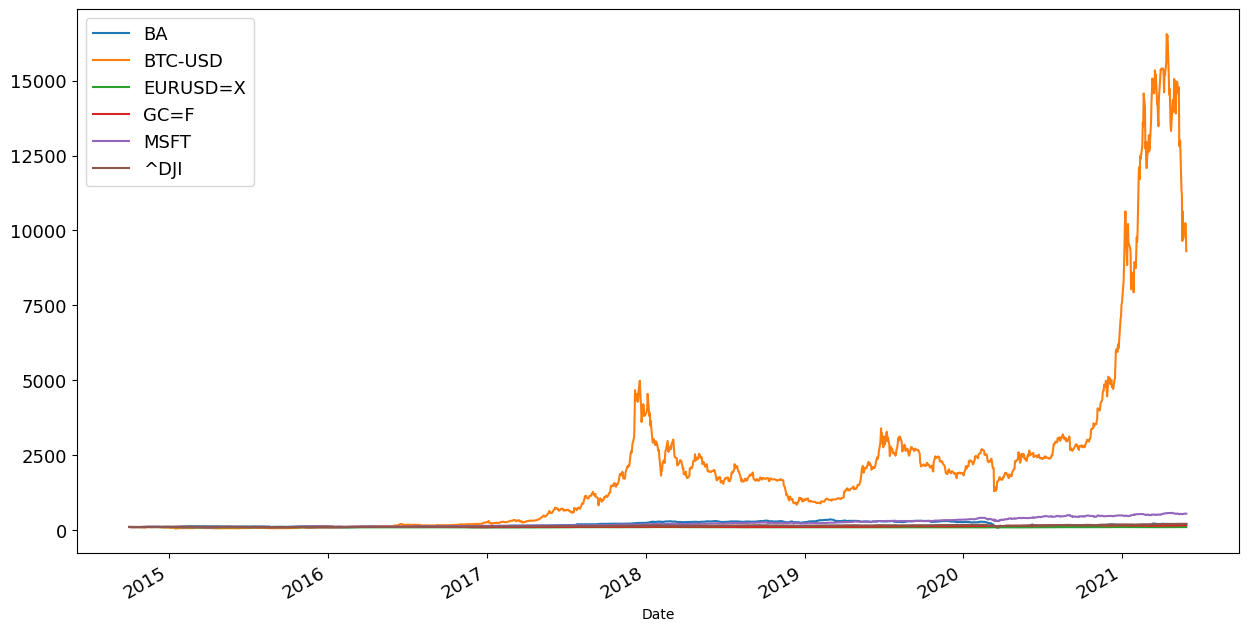

In [24]:
# let's plot again
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = False) # still difficult to interpret bc of BTC performance
plt.legend(fontsize = 13)
plt.show()

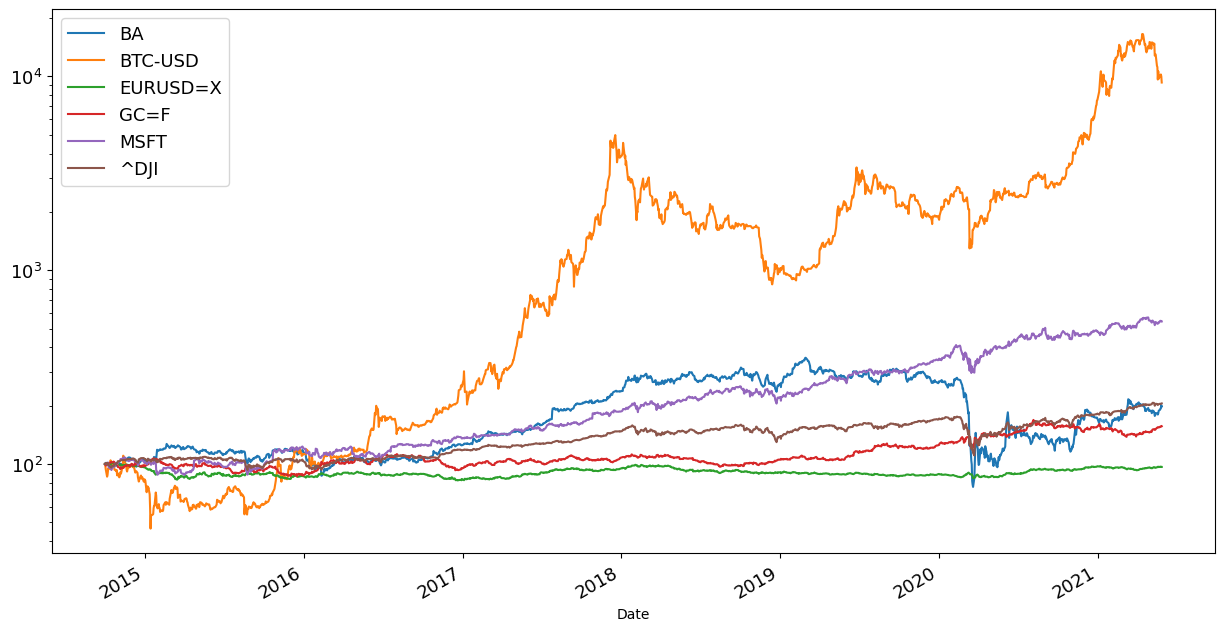

In [25]:
# let's plot again with a logarithmic scale, set with logy = True
# creates a logarithmic scale on the y-axis
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

#### <span style="color:green">__Interlude: Why would I use a logarithmic scale on the y-axis when I plot different stock prices in one graph, Claude.ai?</span>__

> There are several important reasons to use a logarithmic scale when plotting stock prices:
>
>1. Percentage Changes
>- A log scale represents percentage changes, not absolute dollar changes
>- This means a 10% increase looks the same whether it's from \\$10 to \\$11 or from \\$1000 to \\$1100
>- Provides a more meaningful comparison of stock performance
>
>2. Handling Large Price Differences
>- When stocks have very different absolute prices (e.g., a \\$50 stock vs a \\$5000 stock)
>- Log scale prevents smaller-priced stocks from appearing as a flat line
>- Allows visualization of relative growth for all stocks on the same graph
>
>3. Compounding Growth
>- Stocks typically grow exponentially, not linearly
>- Log scale better represents exponential growth patterns
>- Reveals growth trends more accurately than linear scales
>
>4. Volatility Visualization
>- Helps visualize price volatility more evenly across different price ranges
>- Makes it easier to see percentage-based fluctuations

***Normalized prices help to compare financial instruments but they are limited when it comes to measuring/comparing performance in more detail. It's of advantage here to work with relative price changes which are also called `returns`.***

In [27]:
# finally, let's save the close data to a csv file for further use
close.to_csv("../../assets/data/close.csv")